In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
import Operators as op
import SensingMatrix as sm
import Measurements as me
from SetUpImage import setUpImage
from Displays import phase_retrie_plots
import solve

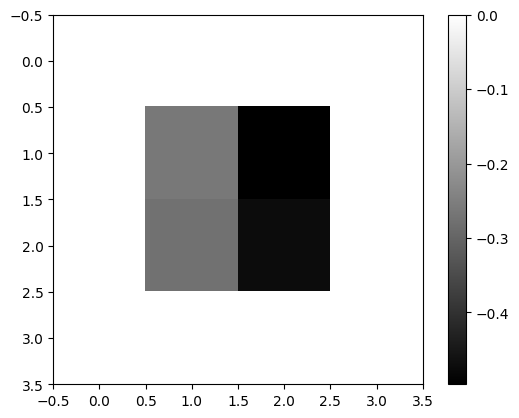

In [18]:
Nx, Ny = 4, 4
n = Nx * Ny
true_images, mask = setUpImage(Nx, Ny) 

#map.f(x_true) < 1e-5

plt.imshow(true_images[2].imag, cmap='gray')
plt.colorbar()

In [19]:
x_true = true_images[2]
x_true_vect = x_true.reshape(Nx * Ny, )

#print("x_true_vect", x_true_vect)
#x = (1 + 2j)*np.ones(x_true_vect.shape)

#noise_lvl = 0.e-4
A = sm.FourierMatrix(Nx,Ny) #sm.iid_stdd_Gauss(Nx,Ny)
#print("A.Matrix", A.Matrix)
#meas, noise = me.gauss_noisy_meas(x_true_vect, noise_lvl , A)()
#map = op.operators(algo = 'complex mirror', meas = meas, A = A)
#map.f( x)
#print(map.psi(2 * x), map.psi(1 * x), map.breg_psi(2 * x, x))

iteration k 0
a 15.940944377285991
t 0.3450608144153829
a 5.267439267942364
t 0.4662172452186343
a 10.673505109343626
t 0.3860243461172488
a 15.672948421585142
t 0.34672270802452143
a 5.1653622173572975
t 0.4685760723734476
a 10.507586204227842
t 0.38769358570747275
a 12.726148063415753
t 0.3676397983133381
a 4.0705859652759875
t 0.49781582425494136
a 8.655562098139763
t 0.4087761555300857
a 15.672948421585142
t 0.34672270802452143
a 5.1653622173572975
t 0.4685760723734476
a 10.507586204227842
t 0.38769358570747275
iterate 1
a 15.648091986057556
t 0.3468786000918582
a 5.155861636836463
t 0.46879833273970617
a 10.492230349221096
t 0.3878496681618421
a 15.390134369246391
t 0.3485144517423867
a 5.05785172410773
t 0.4711190037516073
a 10.332282645138658
t 0.3894918657922398
a 12.549709668088202
t 0.36907504086450205
a 4.005131074727539
t 0.4998397695127575
a 8.544578593360662
t 0.41020693957551646
a 15.390134369246391
t 0.3485144517423867
a 5.05785172410773
t 0.4711190037516073
a 10.332282

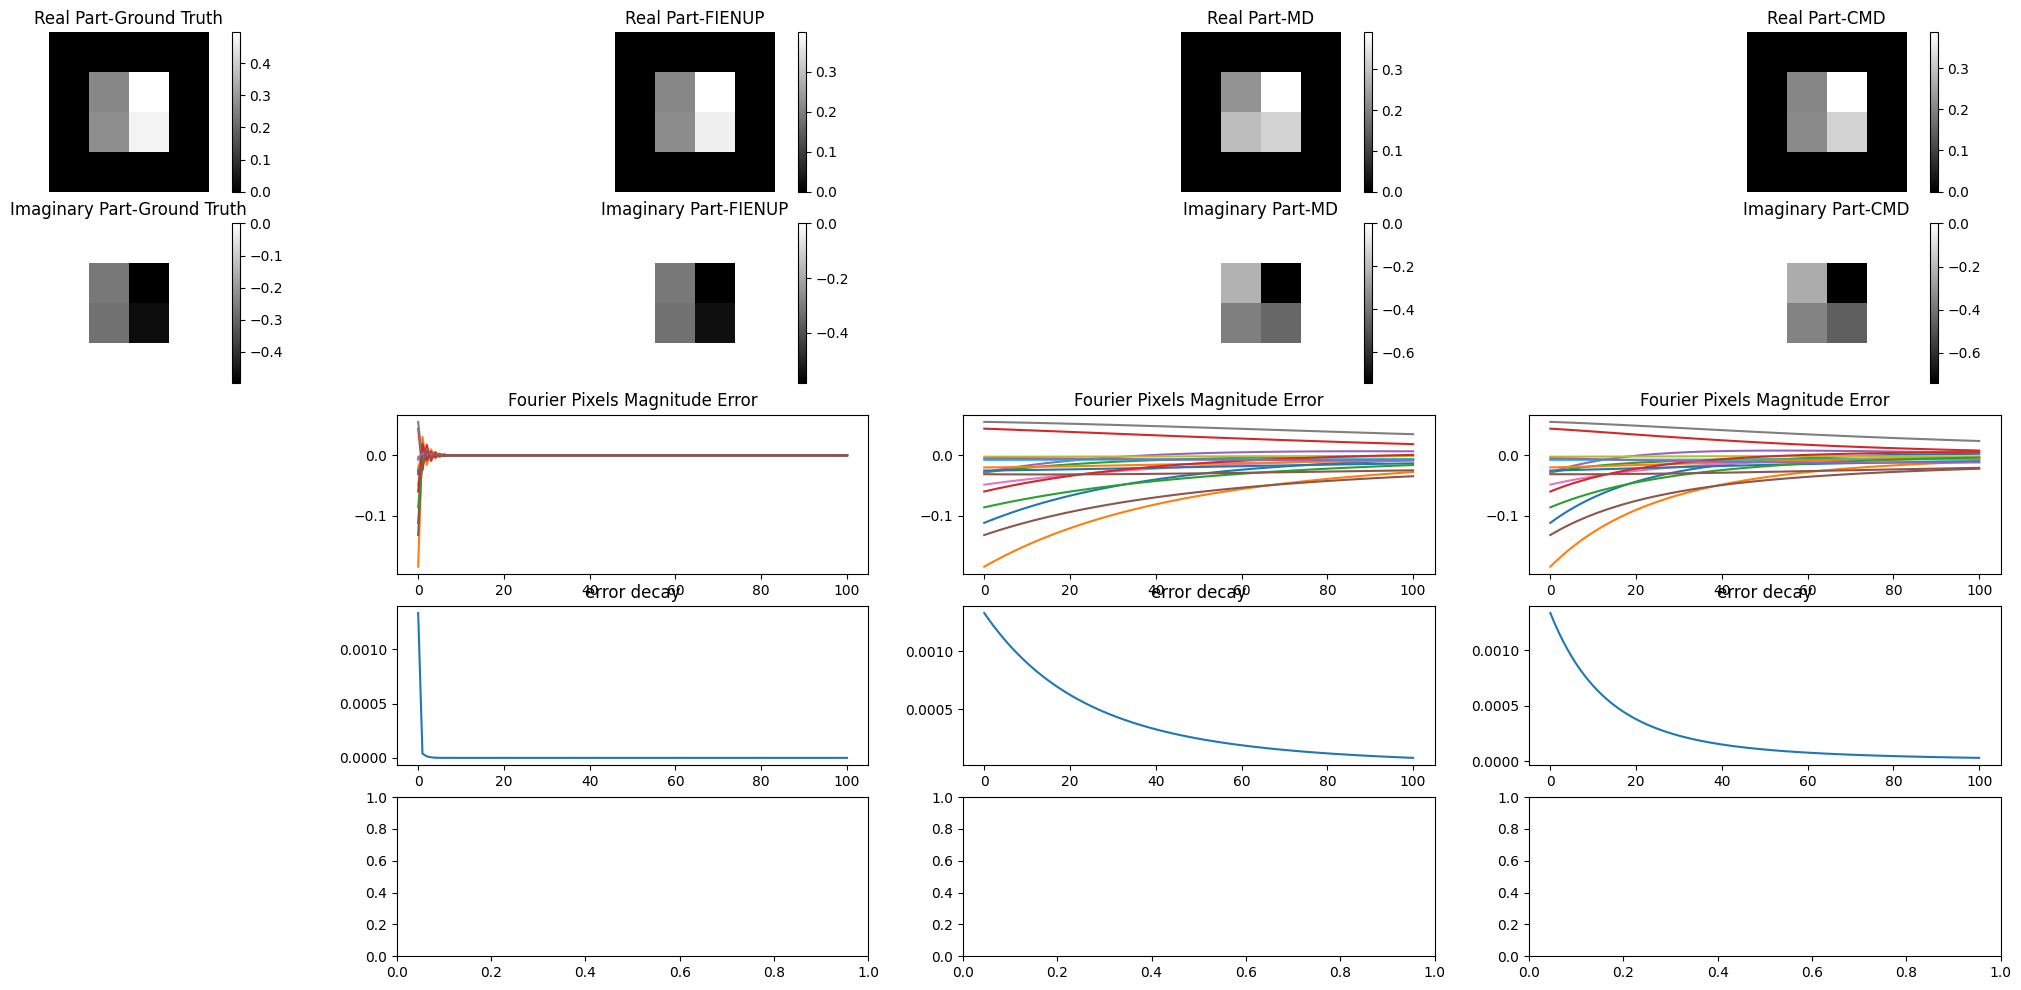

In [22]:
idx = [2] # np.arange(1) # np.arange(len(true_images))
Algos = ['FIENUP', 'real mirror', 'complex mirror' ]
X_sols = []
#fig = plt.figure(figsize=(28,12))
for i in idx:
    x_true = true_images[i]
    x_true_vect = x_true.reshape(Nx * Ny, )
    maxiter = 100
    kappa  = 0.9
    xi = 12
    noise_lvl = 1.e-4
    meas, noise = me.gauss_noisy_meas(x_true_vect, noise_lvl , A)()
    L = 1 * op.smoothnessPara_L(A.Matrix, noise)
    #print("meas", meas)
    x0 = op.initialise(n, meas, A.Matrix, type ='close', real = 1, imag = 1, x_true_vect = x_true_vect, mask = mask )
    for Algo in Algos:
        map = op.operators(algo = Algo, meas = meas, A = A) 
        x_sols = solve.phase_retrieval(L, kappa, xi, Algo, map, mask, n, A.Matrix, meas, maxiter, x0 )
        X_sols.append(x_sols)
    phase_retrie_plots(i, true_images, X_sols, map, A, meas, maxiter)